(-0.5, 27.5, 27.5, -0.5)

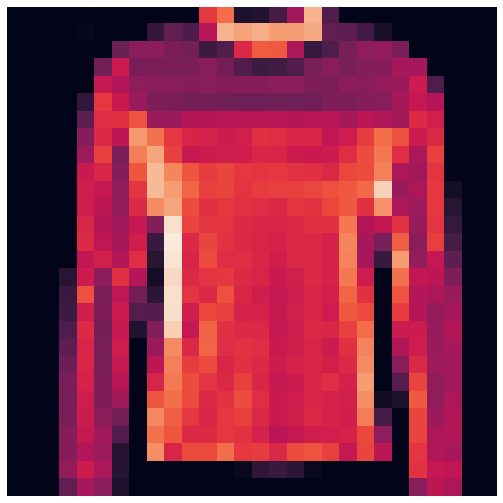

In [60]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import sklearn


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from knn import KNNClassifier
from my_metrics import binary_classification_metrics, multiclass_accuracy

plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

# Task1

X, y = fetch_openml(name="Fashion-MNIST", return_X_y=True, as_frame=False)

idx_to_stay = np.random.choice(np.arange(X.shape[0]), replace=False, size=300)
X = X[idx_to_stay]
y = y[idx_to_stay]

# возьмем случайную картинку и сделаем reshape
# 28, 28, 1 = H, W, C (число каналов, в данном случае 1)
image = X[np.random.choice(np.arange(X.shape[0]))].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off")

In [61]:
y[:5]

array(['5', '9', '0', '3', '5'], dtype=object)

In [62]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

235200

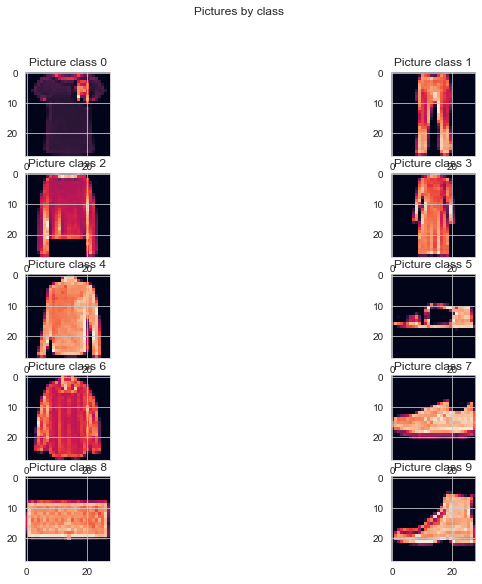

In [63]:
fig, axs = plt.subplots(5,2)
fig.suptitle('Pictures by class')
axs = axs.flatten()
for i in range(0,10):
    s = str(i)
    axs[i].imshow(X[np.where(y==s)[0][0]].reshape(28, 28, 1))
    axs[i].title.set_text('Picture class '+s)

In [64]:
y_df = pd.DataFrame(data=y)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


<AxesSubplot:ylabel='0'>

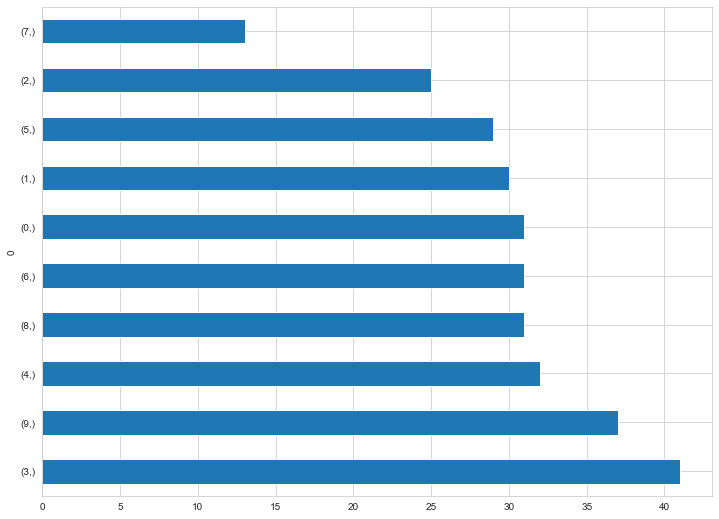

In [65]:
y_df.value_counts().plot(kind='barh')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
random_state=SEED)

In [165]:
X_train_01 = X_train[np.where((y_train=='0') | (y_train=='1'))]
y_train_01 = y_train[np.where((y_train=='0') | (y_train=='1'))]
X_test_01 = X_test[np.where((y_test=='0') | (y_test=='1'))]
y_test_01 = y_test[np.where((y_test=='0') | (y_test=='1'))]

In [171]:
knn_classifier = KNNClassifier(k=1)
knn_classifier.fit(X_train_01, y_train_01)
dists = knn_classifier.compute_distances_two_loops(X_test_01)
%timeit knn_classifier.compute_distances_two_loops(X_test_01)

1.23 µs ± 324 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [69]:
# Task 2
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [70]:
X2, y2 = load_diabetes(as_frame=True, return_X_y=True)

In [71]:
X2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [72]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.6 KB


In [73]:
X2.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1,
random_state=SEED)

In [77]:
X2_train_std = (X2_train-X2_train.mean())/X2_train.std()
X2_test_std = (X2_test-X2_train.mean())/X2_train.std()
y2_train_std = (y2_train-y2_train.mean())/y2_train.std()
y2_test_std = (y2_test-y2_train.mean())/y2_train.std()

In [78]:
from sklearn.pipeline import Pipeline

In [81]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), KNeighborsRegressor())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [96]:
model.fit(X2_train_std, y2_train_std)
y2_predicted = model.predict(X2_test_std)
mse = mean_squared_error(y2_test_std, y2_predicted)
print(mse)

0.5470200320905985


In [99]:
model2 = KNeighborsRegressor(n_neighbors = 3)
model2.fit(X2_train_std, y2_train_std)
y2_pred2=model2.predict(X2_test_std)
y2_pred2

array([ 0.46288406,  0.06817432,  0.58596559,  0.44590729, -0.29682608,
        0.83637284,  0.32706995, -0.8400825 , -0.82734993, -1.13717585,
       -0.95043146,  1.24805934,  1.3584083 ,  0.84910541, -0.18223294,
        0.2124768 ,  0.40770958, -0.35624476,  1.43480373, -1.1583968 ,
       -0.96740822,  0.21672099, -0.08461655,  0.33555833, -1.24752481,
       -0.41990762, -1.20932709, -0.64060553,  1.00189628, -0.23740741,
       -0.32653542, -0.18647713,  0.05544175,  0.01724403, -0.62362877,
       -0.81886155, -0.58543105,  0.24643033,  0.08939527, -0.18647713,
       -0.04217464,  0.89154732, -0.43688438, -0.30955866, -0.42415181])

In [116]:
from my_metrics import r_squared, mse, mae,say_hi
print(r_squared(y2_pred2, y2_test_std))
print(mse(y2_pred2, y2_test_std))
print(mae(y2_pred2, y2_test_std))

-38047.89627830193
24087.097315227034
145.49730626386858


In [125]:
r_sq_ar = []
mse_ar = []
mae_ar = []
for i in range(1,11):
    model2 = KNeighborsRegressor(n_neighbors = i)
    model2.fit(X2_train, y2_train)
    y2_pred2=model2.predict(X2_test)
    r_sq_ar.append(r_squared(y2_pred2, y2_test_std))
    mse_ar.append(mse(y2_pred2, y2_test_std))
    mae_ar.append(mae(y2_pred2, y2_test_std))

Text(0.5, 1.0, 'R squared')

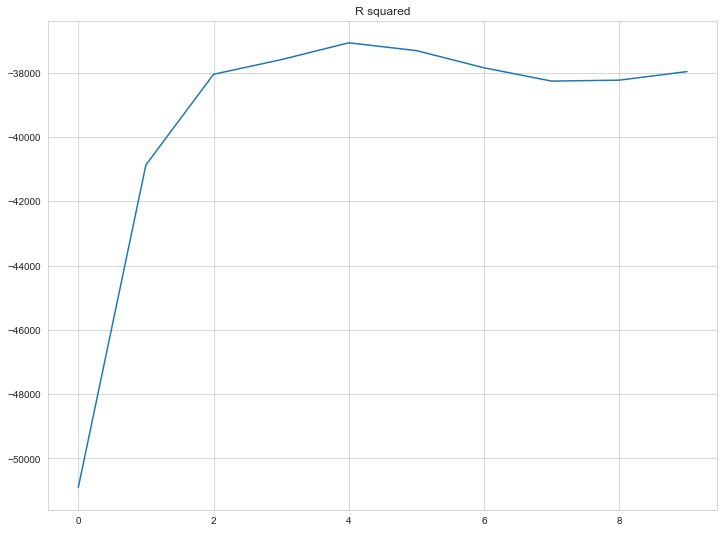

In [127]:
plt.plot(r_sq_ar)
plt.title('R squared')

Text(0.5, 1.0, 'MSE')

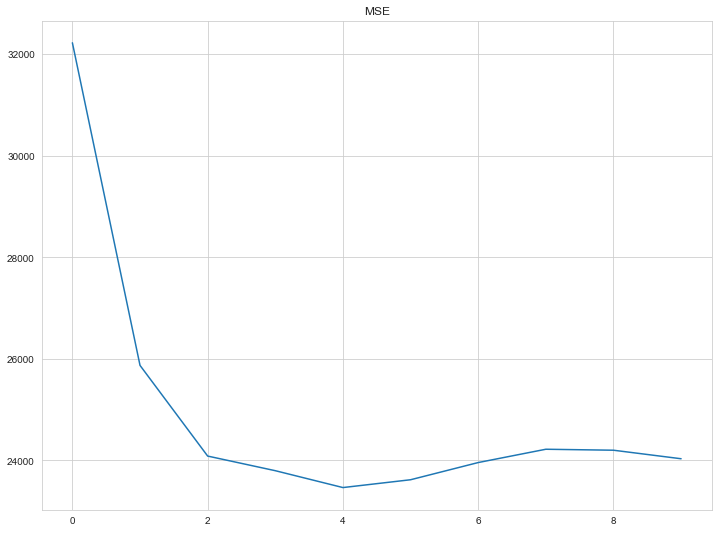

In [128]:
plt.plot(mse_ar)
plt.title('MSE')

Text(0.5, 1.0, 'MAE')

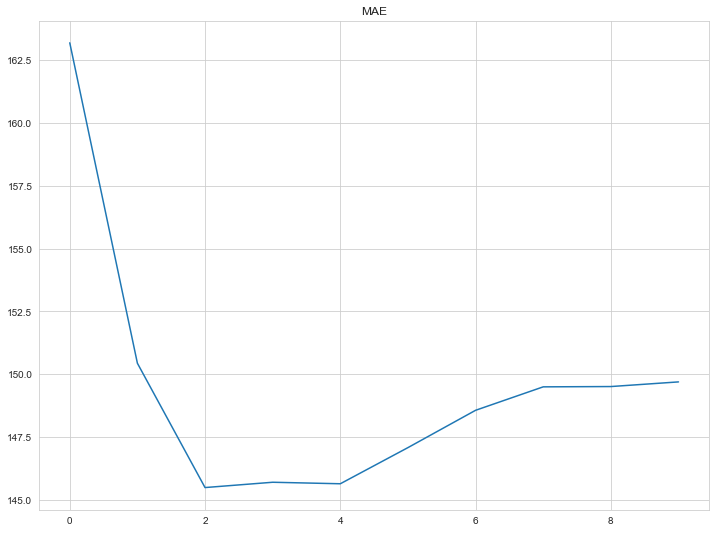

In [129]:
plt.plot(mae_ar)
plt.title('MAE')

In [ ]:
# The optimal number of neighbors is 4.